**Inferential Statistics** is mainly used to test a sample and how that sample holds for entire population ,Hypothesis testing is one of the most important inferential tools.

|                |               |              |
|----------------|---------------|--------------|
|Response Var    |Categorical    |Quantitative  |
|Explanatory Var |               |              |
|Categorical     |Chi Square     |ANOVA         |
|Quantitative    |Chi Square     |Correlation    |
             

Above table defines rule when to apply which test, When Explanatory Variable 
is Categorical and Response Variable in Quantitative we use ANOVA, similar for 
other combinations also, but when Explanatory Variable is Quantitative and 
Response Variable is Categorical we convert Qunatitative Variable to Categorical 
and then use Chi Square, other two cases are clear from above table

### Exploratory Data Analysis
first doing some basic EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
filepath = r'C:\Users\avishek\Downloads\DataFiles\hypothesis'

In [10]:
filenames = ['\\'.join([filepath, filename]) for filename in os.listdir(filepath) if filename.endswith('.csv')]

In [11]:
filenames

['C:\\Users\\avishek\\Downloads\\DataFiles\\hypothesis\\addhealth.csv',
 'C:\\Users\\avishek\\Downloads\\DataFiles\\hypothesis\\gapminder.csv',
 'C:\\Users\\avishek\\Downloads\\DataFiles\\hypothesis\\marscrater.csv',
 'C:\\Users\\avishek\\Downloads\\DataFiles\\hypothesis\\nesarc.csv',
 'C:\\Users\\avishek\\Downloads\\DataFiles\\hypothesis\\ool.csv']

#### Here we will use the gapminder Data as it is properly labeled

In [12]:
#the file size is small but then also will try to load in a iterative way just to show how to load large files
chunks = pd.read_csv(filenames[1], iterator=True, chunksize=500, low_memory=True)
data = pd.concat(chunk for chunk in chunks)

In [13]:
data.shape

(213, 16)

In [15]:
data.columns.values

array(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate',
       'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson',
       'polityscore', 'relectricperperson', 'suicideper100th',
       'employrate', 'urbanrate'], dtype=object)

In [16]:
data.dtypes

country                 object
incomeperperson         object
alcconsumption          object
armedforcesrate         object
breastcancerper100th    object
co2emissions            object
femaleemployrate        object
hivrate                 object
internetuserate         object
lifeexpectancy          object
oilperperson            object
polityscore             object
relectricperperson      object
suicideper100th         object
employrate              object
urbanrate               object
dtype: object

As we can see above all the dtypes are object we have to convert to numeric to do operations apart from country we will convert every thing to numeric

In [18]:
column_names = list(data.columns.values)

In [19]:
column_names[0]

'country'

In [26]:
for i in range(1, len(column_names)):
    column = column_names[i]
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [27]:
#again checking dtypes and we can see all the columns are successfully converted to numerics
data.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

In [29]:
#setting limit on how many columns and rows to show for pandas dataframe, None means maximum
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
#to get a basic understanding of data
data.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,190.000000,187.000000,164.000000,173.000000,2.000000e+02,178.000000,147.000000,192.000000,191.000000,63.000000,161.000000,136.000000,191.000000,178.000000,203.000000
mean,8740.966076,6.689412,1.444016,37.402890,5.033262e+09,47.549438,1.935442,35.632716,69.753524,1.484085,3.689441,1173.178995,9.640839,58.635955,56.769360
std,14262.809083,4.899617,1.709008,22.697901,2.573812e+10,14.625743,4.376727,27.780285,9.708621,1.825090,6.314899,1681.440173,6.300178,10.519454,23.844933
min,103.775857,0.030000,0.000000,3.900000,1.320000e+05,11.300000,0.060000,0.210066,47.794000,0.032281,-10.000000,0.000000,0.201449,32.000000,10.400000
25%,748.245151,2.625000,0.480907,20.600000,3.484617e+07,38.725000,0.100000,9.999604,64.447000,0.532541,-2.000000,203.652109,4.988449,51.225000,36.830000
50%,2553.496056,5.920000,0.930638,30.000000,1.859018e+08,47.549999,0.400000,31.810121,73.131000,1.032470,6.000000,597.136436,8.262893,58.699999,57.940000
75%,9379.891165,9.925000,1.611383,50.300000,1.846084e+09,55.875000,1.300000,56.416046,76.593000,1.622737,9.000000,1491.145249,12.328551,64.975000,74.210000
max,105147.437697,23.010000,10.638521,101.100000,3.342209e+11,83.300003,25.900000,95.638113,83.394000,12.228645,10.000000,11154.755033,35.752872,83.199997,100.000000


In [32]:
#to check nulls in every column, apply will do series wise operation
#as we can see all the columns are having null values apart from country, also oilperperson is haivng 150 null values 
#out of 213(no. of rows) so we can ignore that column
#also remember the data is country wise
data.apply(lambda x : sum(x.isnull()))

country                   0
incomeperperson          23
alcconsumption           26
armedforcesrate          49
breastcancerper100th     40
co2emissions             13
femaleemployrate         35
hivrate                  66
internetuserate          21
lifeexpectancy           22
oilperperson            150
polityscore              52
relectricperperson       77
suicideper100th          22
employrate               35
urbanrate                10
dtype: int64

In [34]:
#now checking no of uniques from each column
data.apply(lambda x : x.nunique())

country                 213
incomeperperson         190
alcconsumption          180
armedforcesrate         164
breastcancerper100th    136
co2emissions            200
femaleemployrate        153
hivrate                  46
internetuserate         192
lifeexpectancy          189
oilperperson             63
polityscore              21
relectricperperson      132
suicideper100th         191
employrate              139
urbanrate               194
dtype: int64

In [35]:
#also we can check for skew in our data
data.skew()

incomeperperson          3.250478
alcconsumption           0.619112
armedforcesrate          2.807011
breastcancerper100th     1.041531
co2emissions            11.026398
femaleemployrate         0.018634
hivrate                  3.827599
internetuserate          0.455625
lifeexpectancy          -0.822406
oilperperson             3.865407
polityscore             -0.722683
relectricperperson       3.179511
suicideper100th          1.411813
employrate               0.139842
urbanrate               -0.018848
dtype: float64

**negative** **skew**: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.

**positive skew**: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.

<img src="skew.jpg">

#### Central Limit Theorem [wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)
Distribution of the statistics of samples will be normally distributed given adequate number 
and size of samples are taken


**Hypothesis Testing** <br>
    Null Hypothesis : There is no relation between Explanatory and Response variable. <br>
    Alternate Hypothesis : There is a Relation.


**P Value**  (also called type 1 error rate) <br>
No. of times out of 100 we would be wrong if we reject the null hypothesis <br>
so for our hypothesis test we take p-value(alpha) to be .05 or 5%, means if p-value if less than .05 we can reject the null hypothesis

** ANOVA, Chi Square and Regresssion are BIVARIATE tests

**example**: we take four samples (50 each) from a population and test something e.g. four samples will be race (explanatory var) of people and the no of times they eat non-veg(response var) in a week, now if the mean no. non-veg eating in a week for all the races are equal then we have evidence in favour of **null hypothesis** as it tells that non-veg eating is not dependent on race but if all the means are not equal we have evidence against null hypothesis means these two things are dependent so we take **alternate hypothesis**

## ANOVA

what we test in ANOVA - are the differences among the sample means due to true differences among the 
population means or mearly due to sampling variablility (The term "sampling variability" refers to the fact that the statistical information from a sample (called a statistic) will vary as the random sampling is repeated)

ANOVA F test - it states that not only we need to see the "variation among the sample means" but also the "variation within groups"

The formula for the **f value** is below

In [78]:
%%latex
\begin{align}
f& =\frac{variation\hspace{0.2cm}among\hspace{0.2cm}sample\hspace{0.2cm}means}{variation\hspace{0.2cm}within\hspace{0.2cm}groups}
\end{align}

<IPython.core.display.Latex object>

from above formula we can infer that if the "variation among sample means" dominates "variation within groups" then the data provides very little evidence against null hypothesis ,but if domination is vice versa we have strong evidence against null hypothesis

As from the table we can see to test for ANOVA our explanatory variable should be Categorical and our
response variable should be quantitative. 
Here we will test if alcohol consumption (Explanatory - which we will convert to categorical) has effect on suicideper100 (Response)

In [119]:
#now we will make our test data frame and remove nulls
data_test = data[['alcconsumption', 'suicideper100th']].copy()
data_test.dropna(inplace=True)

In [120]:
#here we create a new variable 
data_test['alcoholCategory'] = pd.cut(data_test['alcconsumption'], bins=2, labels=[1,2], include_lowest=True)

In [121]:
#as we can see we divided our alcohol consumption into a categorical variable with two values
data_test['alcoholCategory'].unique()

[1, 2]
Categories (2, int64): [1 < 2]

In [123]:
data_test = data_test.drop('alcconsumption', 1)

In [124]:
#as we can we dont have any nulls 
data_test.apply(lambda x : sum(x.isnull()))

suicideper100th    0
alcoholCategory    0
dtype: int64

In [125]:
data_test.size
#number of rows

370

In [126]:
data_test.dtypes

suicideper100th     float64
alcoholCategory    category
dtype: object

In [103]:
#importing the required libraries for doing the test
import statsmodels.formula.api as smf

In [127]:
#here we are using ols - ordinary least square , also below is the syntax
model1 = smf.ols(formula='suicideper100th ~ C(alcoholCategory)', data=data_test)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        suicideper100th   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     18.73
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           2.48e-05
Time:                        22:31:48   Log-Likelihood:                -593.60
No. Observations:                 185   AIC:                             1191.
Df Residuals:                     183   BIC:                             1198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.7042      0.488     17.825      0.000       7.741       9.668
C(alcoholCategory)[T.2]     5.0035      1.156      4.328      0.000       2.722       7.285
==============================================================================
Omnibus:                       59.701   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.247
Skew:                           1.431   Prob(JB):                     2.13e-31
Kurtosis:                       6.183   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now from above result we can see our f value is larger also our p value is significantly smaller than 0.05 which 
tells us that our result is significant and not by chance, also the p value suggests that we can ignore the null hypothesis and accept the alternate hypothesis that **there is a relation** between suicideper100 and quantity of alcohol consumption


In [128]:
#printing mean of different groups to check
data_test.groupby('alcoholCategory').mean()

,suicideper100th
alcoholCategory,
1,8.704246
2,13.707727


as we can see there is a significant difference between means of two different groups

In [129]:
#printing standard deviation of different groups just to see
data_test.groupby('alcoholCategory').std()

,suicideper100th
alcoholCategory,
1,5.770432
2,7.081141


now what if categorical explanatory variable has more than two groups, for this we will create new dataframe with 
income as explanatory variable and alcohol consumption as response variable

In [165]:
#creating new data frame
data_test1 = data[['incomeperperson', 'alcconsumption']].copy()
data_test1.dropna(inplace=True)
data_test1.apply(lambda x : sum(x.isnull()))

incomeperperson    0
alcconsumption     0
dtype: int64

In [166]:
data_test1['incomeCategory'] = pd.cut(data_test1['incomeperperson'], bins=4, labels=[1,2,3,4])

In [167]:
data_test1['incomeCategory'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [168]:
data_test1 = data_test1.drop('incomeperperson', 1)

In [169]:
data_test1.apply(lambda x : sum(x.isnull()))

alcconsumption    0
incomeCategory    0
dtype: int64

In [170]:
model2 = smf.ols(formula='alcconsumption ~ C(incomeCategory)', data=data_test1)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         alcconsumption   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.912
Date:                Sun, 01 Oct 2017   Prob (F-statistic):            0.00978
Time:                        22:58:09   Log-Likelihood:                -532.18
No. Observations:                 179   AIC:                             1072.
Df Residuals:                     175   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.2811      0.393     15.970      0.000       5.505       7.057
C(incomeCategory)[T.2]     3.0752      1.259      2.442      0.016       0.590       5.560
C(incomeCategory)[T.3]     3.4064      1.436      2.372      0.019       0.572       6.241
C(incomeCategory)[T.4]     3.3789      2.790      1.211      0.228      -2.128       8.886
==============================================================================
Omnibus:                       14.802   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.037
Skew:                           0.715   Prob(JB):                     0.000329
Kurtosis:                       3.323   Cond. No.                         7.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
data_test1.groupby('incomeCategory').mean()

,alcconsumption
incomeCategory,
1,6.281081
2,9.356250
3,9.687500
4,9.660000


In [172]:
data_test1.groupby('incomeCategory').std()

,alcconsumption
incomeCategory,
1,4.861032
2,4.529893
3,4.365914
4,2.768158


In [173]:
#showing no. of rows in each income group
data_test1.groupby('incomeCategory').size()

incomeCategory
1    148
2     16
3     12
4      3
dtype: int64

here even though we have p-value < 0.05 we cant reject the null hypothesis , as we have multiple levels of our categorical variable and our test does not tells us in what way the means are not statistically equal

for this we need to do post-hoc (after the fact) test <br>
here we will do tukey's Honestly Significant Difference test (**HSD**)

In [174]:
#doing the required import
import  statsmodels.stats.multicomp as multi

In [175]:
mc1 = multi.MultiComparison(data_test1['alcconsumption'], data_test1['incomeCategory'])
res1 = mc1.tukeyhsd()
res1.summary()

group1,group2,meandiff,lower,upper,reject
1,2,3.0752,-0.1912,6.3415,False
1,3,3.4064,-0.319,7.1318,False
1,4,3.3789,-3.8593,10.6171,False
2,3,0.3312,-4.4086,5.0711,False
2,4,0.3037,-7.5051,8.1126,False
3,4,-0.0275,-8.0392,7.9842,False


in above table we check the last column if the value is true in that case we can reject the null hypothesis, but here all are false so we can't reject the null hypothesis in any case , so we have to accept the null hypothesis .. also we can see our categorical data was not evenly distributed from "data_test1.groupby('incomeCategory').size()", so may be low p-value was just by some data categorization error (just my thought)

## Chi^2 

when both the variables are categorical <br>
chi^2 test of independence - when both the variables are categorical, <br> 
In the standard applications of the test, the observations are classified into mutually exclusive classes, and there is some theory, or say null hypothesis, which gives the probability that any observation falls into the corresponding class. The purpose of the test is to evaluate how likely it is between the observations and the null hypothesis.** [wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test) ** <br>

Now as from probability p (A * B) = P(A) * P(B) (for mutually exclusive)
so if we put our categorical data in crosstab format and after that calculate the probabilities for each cell we will get the values (expected data) if the null hypothesis was true. And then we can compare that with the original crosstab data (observed data) <br>
Below is the formula

In [191]:
%%latex
\begin{align}
chi^2& =\sum _{all\hspace{0.1cm}cells}\frac{(expected\hspace{0.2cm}counts - observed\hspace{0.2cm}counts)^2}{expected\hspace{0.2cm}counts}
\end{align}

<IPython.core.display.Latex object>

now depending on the no of categories in each variable we have a value considered large , and if our chi^2 value is larger than that value we can reject null hypothesis. <br>
But here also we will use p-value to make any conclusion

In [192]:
#now we will use the chi squared test , so for that we need two categorical variable, here we will use internet use vs urban rate
#and make these two categorical
data_test2 = data[['internetuserate','urbanrate']].copy()
data_test2.dropna(inplace=True)
data_test2.apply(lambda x : sum(x.isnull()))

internetuserate    0
urbanrate          0
dtype: int64

In [193]:
data_test2.size

380

In [194]:
data_test2['internetCategory'] = pd.cut(data_test2['internetuserate'], bins=2, labels=[1,2])
data_test2['internetCategory'].unique()

[1, 2]
Categories (2, int64): [1 < 2]

In [196]:
data_test2['urbanCategory'] = pd.cut(data_test2['urbanrate'], bins=2, labels=[3,4])
data_test2['urbanCategory'].unique()

[3, 4]
Categories (2, int64): [3 < 4]

In [197]:
data_test2 = data_test2.drop(['internetuserate','urbanrate'], 1)

In [199]:
#now we have our data
data_test2.head()

,internetCategory,urbanCategory
0,1,3
1,1,3
2,1,4
3,2,4
4,1,4


here we will use urbanCategory as explanotory variable and internetCategory as response variable

In [200]:
#import required libraries
import scipy.stats

In [201]:
ct1 = pd.crosstab(data_test2['internetCategory'], data_test2['urbanCategory'])
ct1

urbanCategory,3,4
internetCategory,,
1,79,52
2,9,50


In [203]:
# now generation column percentage
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
colpct

urbanCategory,3,4
internetCategory,,
1,0.897727,0.509804
2,0.102273,0.490196


In [207]:
print('chi 2 value, ','p value, ','count')
cs1 = scipy.stats.chi2_contingency(ct1)
cs1

chi 2 value,  p value,  count


(31.417949915001699,
 2.0804860352894607e-08,
 1,
 array([[ 60.67368421,  70.32631579],
        [ 27.32631579,  31.67368421]]))

as from above result we can see the p-value is really small , which means that internetrate is dependent on urbanrate

Remember when we had more than 2 levels the chi squared value(in this case not in ANOVA) and p value do not provide 
insight into why we should reject the null hypothesis. <br>
Again we need to do the post - hoc test we will use the bonferroni adjustment - in this test we have a adjusted p-values
based on number of comparison eg if we have 5 vategories in our explanatory variable which means we have 5c2 = 10 comparisons
and the bonferroni adjusted p-value will be 0.05/10 for this and we can only reject the null hypothesis when the p-value is less than the bonferroni adjusted p-value = 0.005. <br>

After this we chose two categories at a time and then do the chi squared test and see the p-value and if that is smaller than the adjusted values we can reject the null hypothesis else not. Below is how you can do it

In [211]:
data_test3 = data[['internetuserate','urbanrate']].copy()
data_test3.dropna(inplace=True)
data_test3.apply(lambda x : sum(x.isnull()))
data_test3['internetCategory'] = pd.cut(data_test3['internetuserate'], bins=2, labels=[1,2])
data_test3['urbanCategory'] = pd.cut(data_test3['urbanrate'], bins=3, labels=[3,4,5])
data_test3 = data_test3.drop(['internetuserate','urbanrate'], 1)

In [213]:
mapcodes = {3: 3, 4: 4}
data_test3['test_col'] = data_test3['urbanCategory'].map(mapcodes)

In [217]:
data_test3['test_col'].unique()
#now we can use this test_col for comparing 3, 4 values of urbanCategory to internetCategory, 
#similarly we can do for 4, 5 and 3, 5

array([  3.,   4.,  nan])

In [218]:
data_test3['urbanCategory'].unique()

[3, 4, 5]
Categories (3, int64): [3 < 4 < 5]

## Pearson Correlation

when both the variables are quantitative. <br>
this is a measure of the **linear correlation** between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation

In [219]:
#creating a test dataframe for our testing 
data_test4 = data[['internetuserate','urbanrate']].copy()
data_test4.dropna(inplace=True)

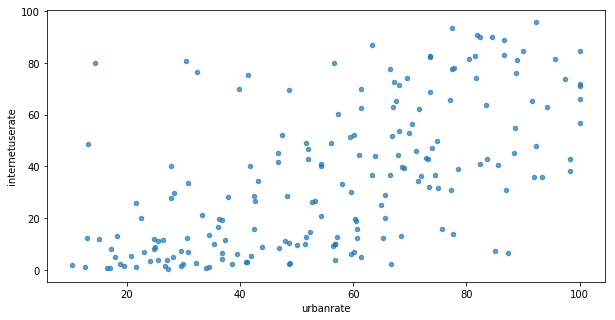

In [235]:
#the best way to look at two quantitative variable is to look at the scatter plot
%matplotlib inline
data_test4.plot(kind='scatter', x='urbanrate', y='internetuserate', figsize=((10,5)), alpha=0.7)

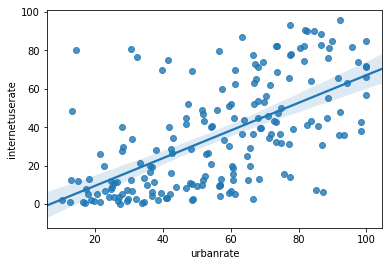

In [234]:
#also we can plot the above plot using seaborn regplot which will have the best fit line 
import seaborn as sns
sns.regplot(data=data_test4, x='urbanrate', y='internetuserate')

as we can see from above plot that we have a +ve linear relationship but for determining how strong is the relationship 
we will use the pearson correlation coefficient (r)

In [243]:
#now calculating the pearson coefficient
print(' r                  ,   p-value')
scipy.stats.pearsonr(data_test4['urbanrate'], data_test4['internetuserate'])

 r                  ,   p-value


(0.61394607018668523, 4.5596405351862438e-21)

as we can see from above output we have a +ve correlation and our p-value in very less , so there is a relation between the two variables

*Post Hoc Tests* are only conducted when we have categorical explanatory variable <br>
Also we can use r value for other statistics calculation, e.g. 0.61^2 = 0.37, this states that if we know the "urban rate",
we can predict 37% variability we will see in the rate of internet usage


## Statistical Interaction
it is defined as relation between two variable that is dependent upon or moderated by a third variable. <br>
e.g. do people prefer soy sauce or ketchup is dependent on the food they are eating

what we can do here is we can take the two variables and then test the hypothesis using ANOVA or chi-square , depending on the type of explanatory and response variable, after that we can do the same testing considering the different values of moderator variable and see how our result varies.